In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
filename = "Bottleneck based on different factors - K-Path Matching.csv"
df = pd.read_csv(filename)

display(df)

,Model,Node Memory Capacity (MB),# of Nodes,# of Bandwidth Classes,Bottleneck Latency (s)
0,ResNet50,64,5,2,2.606314
1,ResNet50,64,5,5,2.453315
2,ResNet50,64,5,8,2.402171
3,ResNet50,64,5,11,2.386268
4,ResNet50,64,5,14,2.401167
...,...,...,...,...,...
380,EfficientNetB1,128,50,8,0.047215
381,EfficientNetB1,128,50,11,0.047387
382,EfficientNetB1,128,50,14,0.047270
383,EfficientNetB1,128,50,17,0.046074


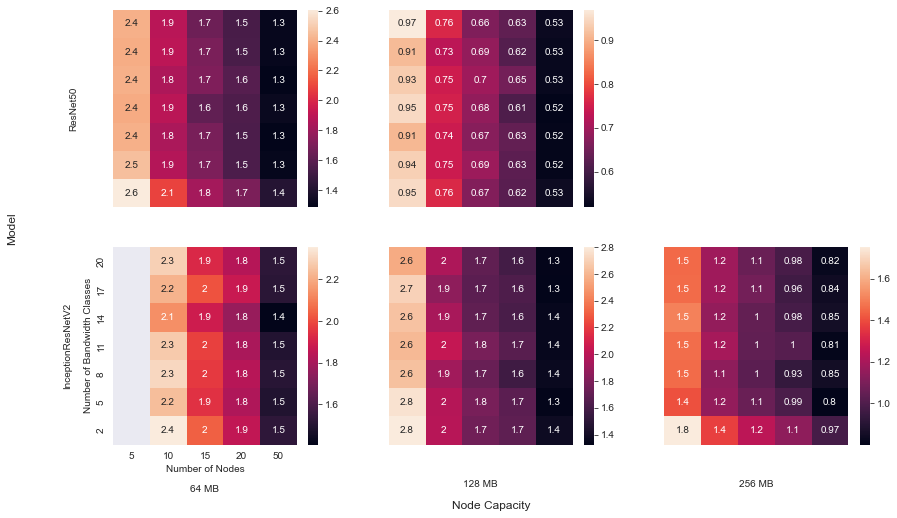

In [18]:
#models = ['MobileNetV2', 'EfficientNetB1', 'ResNet50', 'InceptionResNetV2']
models = ['ResNet50', 'InceptionResNetV2']
#mems = [[64], [64, 128], [64, 128], [64, 128, 256]]
mems = [[64, 128], [64, 128, 256]]

node_categories = np.unique(df['# of Nodes'])
bandwidth_classes = np.unique(df['# of Bandwidth Classes'])[::-1]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
for i in range(len(mems)):
    sub_mems = mems[i]
    model = models[i]
    for sm in range(3):
        if sm > len(sub_mems) - 1:
            fig.delaxes(ax[i][sm])
            continue
        mem_df = df.loc[(df['Node Memory Capacity (MB)'] == sub_mems[sm]) & (df['Model'] == model), ['# of Nodes', 'Bottleneck Latency (s)']]
        grouped = mem_df.groupby('# of Nodes')['Bottleneck Latency (s)'].apply(list)
        ls = grouped.tolist()
        arr = np.array(ls)
        arr = arr.transpose()[:][::-1]
        if sm == 0 and i == len(mems) - 1:
            s = sns.heatmap(arr, xticklabels=node_categories, yticklabels=bandwidth_classes, annot=True, ax=ax[i][sm])
        else:
            s = sns.heatmap(arr, xticklabels=False, yticklabels=False, annot=True, ax=ax[i][sm])
        xlabel = ''
        ylabel = ''
        if i == len(mems) - 1:
            if sm == 0:
                prefix = 'Number of Nodes'
            else:
                prefix = '\n'
            xlabel = f'{prefix}\n\n{sub_mems[sm]} MB'
        if sm == 0:
            if i == len(mems) - 1:
                suffix = 'Number of Bandwidth Classes'
            else:
                suffix = '\n'
            ylabel = f'{models[i]}\n\n{suffix}'

        s.set(xlabel=xlabel, ylabel=ylabel)

fig.supxlabel('Node Capacity')
fig.supylabel('Model')
plt.savefig('Bottleneck Latency Plots - K-Path Matching')